# 環境測試

In [ ]:
!nvidia-smi

Sun Nov  9 03:55:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
import torch as pytorch
pytorch.cuda.is_available()

True

In [ ]:
print(tf.__version__)
print(pytorch.__version__)

2.19.0
2.8.0+cu126


# 模型建立

## dataset

In [2]:
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = fetch_kddcup99(subset='SA', as_frame=True)

df = data.frame

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [ ]:
import pandas as pd

df = pd.get_dummies(df)
df.head()
corr = df.corr()
corr

In [4]:
X = data.data
y = data.target

In [5]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [6]:
X.drop(['duration', 'protocol_type', 'service', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot','num_failed_logins', 'logged_in', 'num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells','num_access_files', 'num_outbound_cmds', 'is_host_login','is_guest_login'], axis=1, inplace=True)

/tmp/ipython-input-85749210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['duration', 'protocol_type', 'service', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot','num_failed_logins', 'logged_in', 'num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells','num_access_files', 'num_outbound_cmds', 'is_host_login','is_guest_login'], axis=1, inplace=True)


In [7]:
X.columns

Index(['count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [8]:
X

,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100650,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100651,447,447,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100652,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100653,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X.srv_diff_host_rate.value_counts()

,count
srv_diff_host_rate,
0.0,67624
1.0,7121
0.12,1506
0.5,1255
0.67,1216
...,...
0.64,2
0.88,2
0.54,2


In [64]:
print(len(X.columns))

19


In [42]:
import pandas as pd

X = pd.get_dummies(X)

In [9]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.17083623, -0.18650599, -0.10129452, ..., -0.09866996,
        -0.25621761, -0.25472488],
       [-0.17083623, -0.18650599, -0.10129452, ..., -0.09866996,
        -0.25621761, -0.25472488],
       [-0.17083623, -0.18650599, -0.10129452, ..., -0.09866996,
        -0.25621761, -0.25472488],
       ...,
       [ 6.14782755,  6.25088396, -0.10129452, ..., -0.09866996,
        -0.25621761, -0.25472488],
       [ 6.14782755,  6.25088396, -0.10129452, ..., -0.09866996,
        -0.25621761, -0.25472488],
       [ 2.70585165, -0.07132406, 10.80003968, ..., 11.15669875,
        -0.25621761, -0.25472488]])

In [66]:
print(len(X.columns))

19


In [67]:
y

,labels
0,b'normal.'
1,b'normal.'
2,b'normal.'
3,b'normal.'
4,b'normal.'
...,...
100650,b'smurf.'
100651,b'smurf.'
100652,b'smurf.'
100653,b'smurf.'


In [68]:
y.unique()

array([b'normal.', b'smurf.', b'neptune.', b'back.', b'satan.',
       b'teardrop.', b'ipsweep.', b'portsweep.', b'nmap.', b'pod.',
       b'warezclient.'], dtype=object)

In [ ]:
# 類別轉換自創方法，但給個byte可能隱藏其它字元，目前不成功。
y_fixed = []
for i in y:
  if i == b'normal.':
    y_fixed.append(0)
  elif i == b'smurf.':
    y_fixed.append(1)
  elif i == b'neptune.':
    y_fixed.append(2)
  elif i == b'back.':
    y_fixed.append(3)
  elif i == b'land.':
    y_fixed.append(4)
  elif i == b'pod.':
    y_fixed.append(5)
  elif i == b'teardrop.':
    y_fixed.append(6)
  elif i == b'not_normal.':
    y_fixed.append(7)
  elif i == b'ftp_write.':
    y_fixed.append(8)
  elif i == b'guess_passwd.':
    y_fixed.append(9)
  else:
    y_fixed.append(10)

  y_fixed

In [ ]:
# 上面轉換方式的檢查
for i in y_fixed:
  if i == 4:
    print(i)

In [69]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
print(y)

[4 4 4 ... 8 8 2]


In [27]:
type(y)

numpy.ndarray

In [70]:
from sklearn.utils import class_weight
import numpy as np
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)

class_weight_dict = dict(enumerate(weights))
class_weight_dict

{0: np.float64(508.35858585858585),
 1: np.float64(1525.0757575757575),
 2: np.float64(9.892383292383292),
 3: np.float64(3050.151515151515),
 4: np.float64(0.09406499460776893),
 5: np.float64(4575.227272727273),
 6: np.float64(915.0454545454545),
 7: np.float64(653.6038961038961),
 8: np.float64(3.8350605806599103),
 9: np.float64(1307.2077922077922),
 10: np.float64(1525.0757575757575)}

## Model construction

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [72]:
model = Sequential()

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(11, activation='softmax'))

In [79]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

history = model.fit(X_scaled, y, epochs=100, batch_size=512, validation_split=0.1, class_weight=class_weight_dict, callbacks=early_stop)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 0.6645 - val_loss: 1.7362
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 0.6645 - val_loss: 2.0058
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.6645 - val_loss: 2.2102
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.6645 - val_loss: 2.3731
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 0.6645 - val_loss: 2.5138
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.6645 - val_loss: 2.6358


## Model evaluation

In [81]:
loss, accuracy = model.evaluate(X_scaled, y)
print("model training accuracy:", accuracy)

3146/3146 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9994 - loss: 0.0081
model training accuracy: 0.9664497375488281


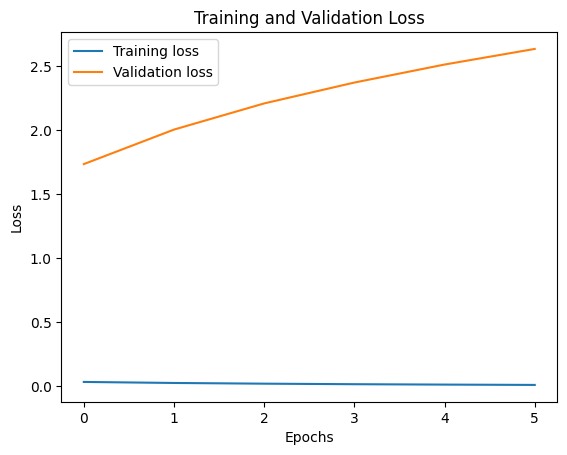

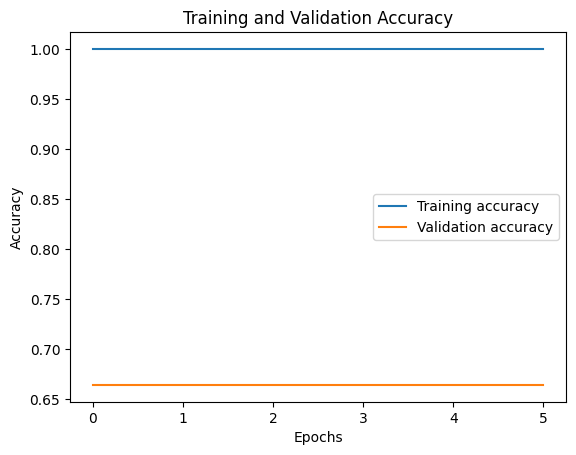

In [82]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [83]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 2)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239 (960.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160 (644.00 B)

以上是NN模型練習已經優化極限的結果，結果還是overfitting，經過chatgpt幫我整理....看起來這個模型不適合超不平衡資料集，接下來我會換傳統ML model來重新訓練測試，希望能有好結果。


# LGBM

In [12]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [88]:
data = fetch_kddcup99(subset='SA', as_frame=True)

df = data.frame

X = data.data
y = data.target

In [14]:
y

,labels
0,b'normal.'
1,b'normal.'
2,b'normal.'
3,b'normal.'
4,b'normal.'
...,...
100650,b'smurf.'
100651,b'smurf.'
100652,b'smurf.'
100653,b'smurf.'


In [15]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [16]:
y

array([4, 4, 4, ..., 7, 7, 2])

In [17]:
type(y)

numpy.ndarray

In [27]:
from sklearn.utils import class_weight
import numpy as np
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)

class_weight2_dict = dict(enumerate(weights))
class_weight2_dict

{0: np.float64(718.9642857142857),
 1: np.float64(774.2692307692307),
 2: np.float64(10.62882787750792),
 3: np.float64(10065.5),
 4: np.float64(0.10347149406854582),
 5: np.float64(915.0454545454545),
 6: np.float64(838.7916666666666),
 7: np.float64(4.265042372881356),
 8: np.float64(1118.388888888889),
 9: np.float64(1006.55)}

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lgbmc = lgb.LGBMClassifier(class_weight=class_weight2_dict, random_state=42)
lgbmc.fit(X_train, y_train)

y_pred = lgbmc.predict(X_test)
#
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 80524, number of used features: 19
[LightGBM] [Info] Start training from score -2.282914
[LightGBM] [Info] Start training from score -2.208806
[LightGBM] [Info] Start training from score -2.251261
[LightGBM] [Info] Start training from score -2.041752
[LightGBM] [Info] Start training from score -2.265222
[LightGBM] [Info] Start training from score -2.493737
[LightGBM] [Info] Start training from score -2.329434
[LightGBM] [Info] Start training from score -2.254358
[LightGBM] [Info] Start training from score -2.447217
[LightGBM] [Info] Start training from score -2.552578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9993542297948438
Precision: 0.9991680111161851
Recall: 0.9993542297948438
F1 score: 0.9992584535800779


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    2     0     0     1     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0]
 [    0     0   179     0     0     0     0     0     0]
 [    1     0     0 19476     0     0     3     1     0]
 [    0     0     0     0     4     0     0     0     0]
 [    0     0     0     0     0     3     0     0     0]
 [    0     0     0     3     0     0   449     0     0]
 [    0     0     0     0     0     0     0     3     0]
 [    0     0     0     4     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       179
           4       1.00      1.00      1.00     19481
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.99      0.99      0.99       452
           8       0.75      1.00      0.86         3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
